# Get the world map

In [45]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
display(world)

/tmp/ipykernel_34/3022092566.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


# Get the world loans from Kiva organization www.kiva.org

In [46]:
loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"
world_loans = gpd.read_file(loans_filepath)
display(world_loans)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)
...,...,...,...,...,...,...,...
13657,539,"N/A, direct to Sevamob",DSE Direct,Health,South Africa,50000,POINT (29.60355 -25.94599)
13658,540,"N/A, direct to Sanergy",DSE Direct,Water and Sanitation,Kenya,50000,POINT (36.82195 -1.29207)
13659,542,N/A direct to BioLite Inc.,DSE Direct,Clean Cookstove,Uganda,50000,POINT (32.58252 0.34760)
13660,543,N/A direct to LegWorks Inc.,DSE Direct,Health,Canada,50000,POINT (-79.38318 43.65323)


# Plot the world_loan's data on the world map

<Axes: >

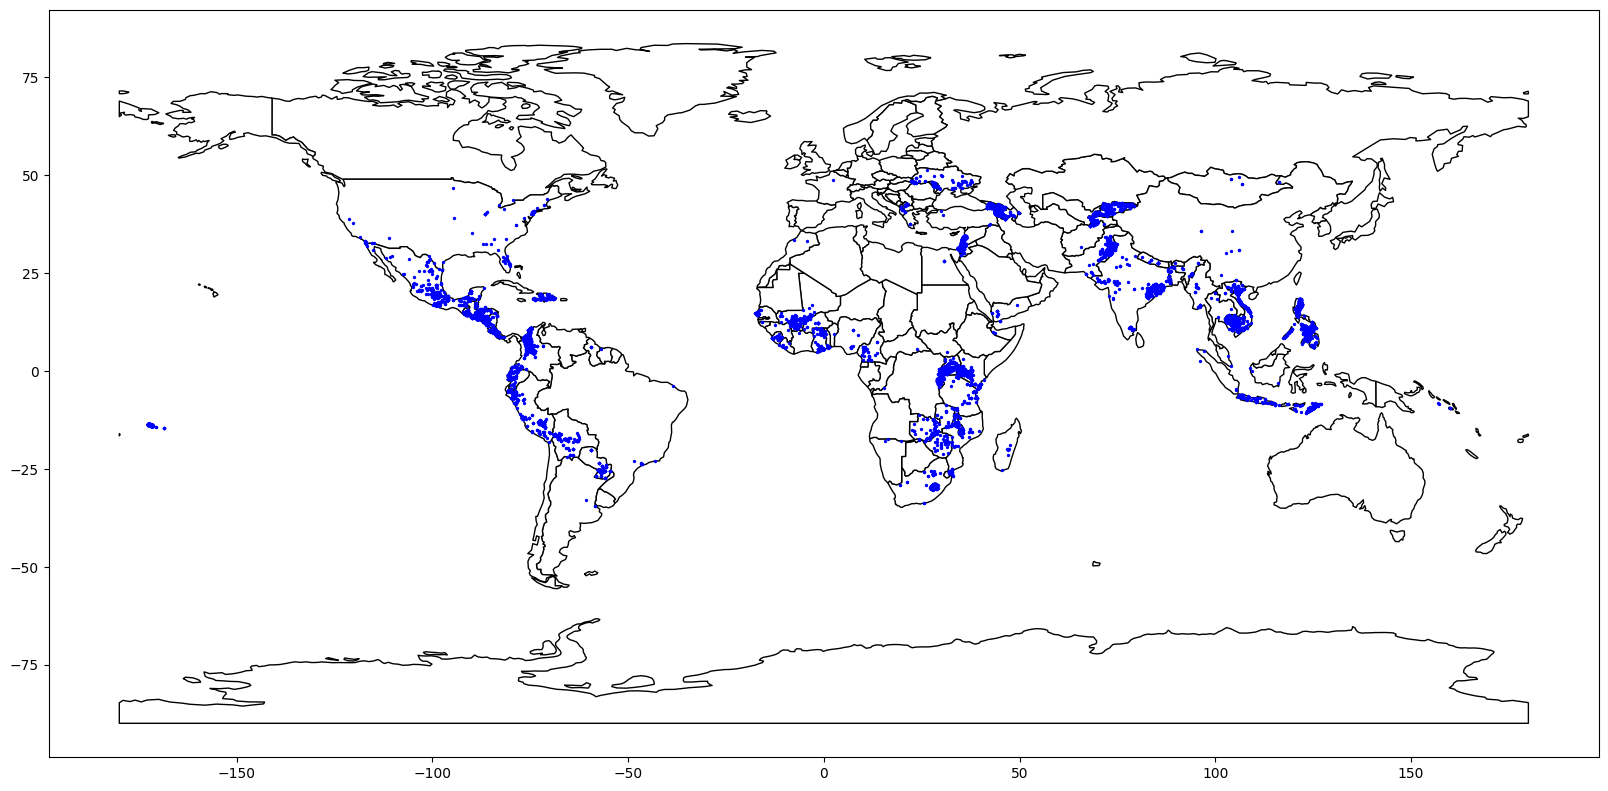

In [47]:
ax = world.plot(figsize=(20, 20), color='white', edgecolor='black')
world_loans.plot(color='blue', markersize=2, ax=ax)

# Query for loans in the Philippines only

In [48]:
PHL_loans = world_loans.loc[world_loans.country == 'Philippines'].copy()
display(PHL_loans)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)
...,...,...,...,...,...,...,...
12376,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,11500,POINT (120.83841 14.35197)
12377,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,17050,POINT (120.83841 14.35197)
12378,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,24000,POINT (120.96597 14.62057)
12379,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,31725,POINT (120.96597 14.62057)


# Load the Philippines' map to plot

In [49]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
display(PHL)

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."
5,Central Luzon,,"MULTIPOLYGON (((120.50102 14.40167, 120.50076 ..."
6,Central Visayas,,"MULTIPOLYGON (((123.14402 9.61596, 123.14359 9..."
7,Cordillera Administrative Region,,"POLYGON ((120.45970 17.50715, 120.46023 17.512..."
8,Davao,,"MULTIPOLYGON (((125.35026 5.36791, 125.35020 5..."
9,Eastern Visayas,,"MULTIPOLYGON (((125.06574 9.96198, 125.06588 9..."


# Plot the loans from Kiva in the Philippines on their map

<Axes: >

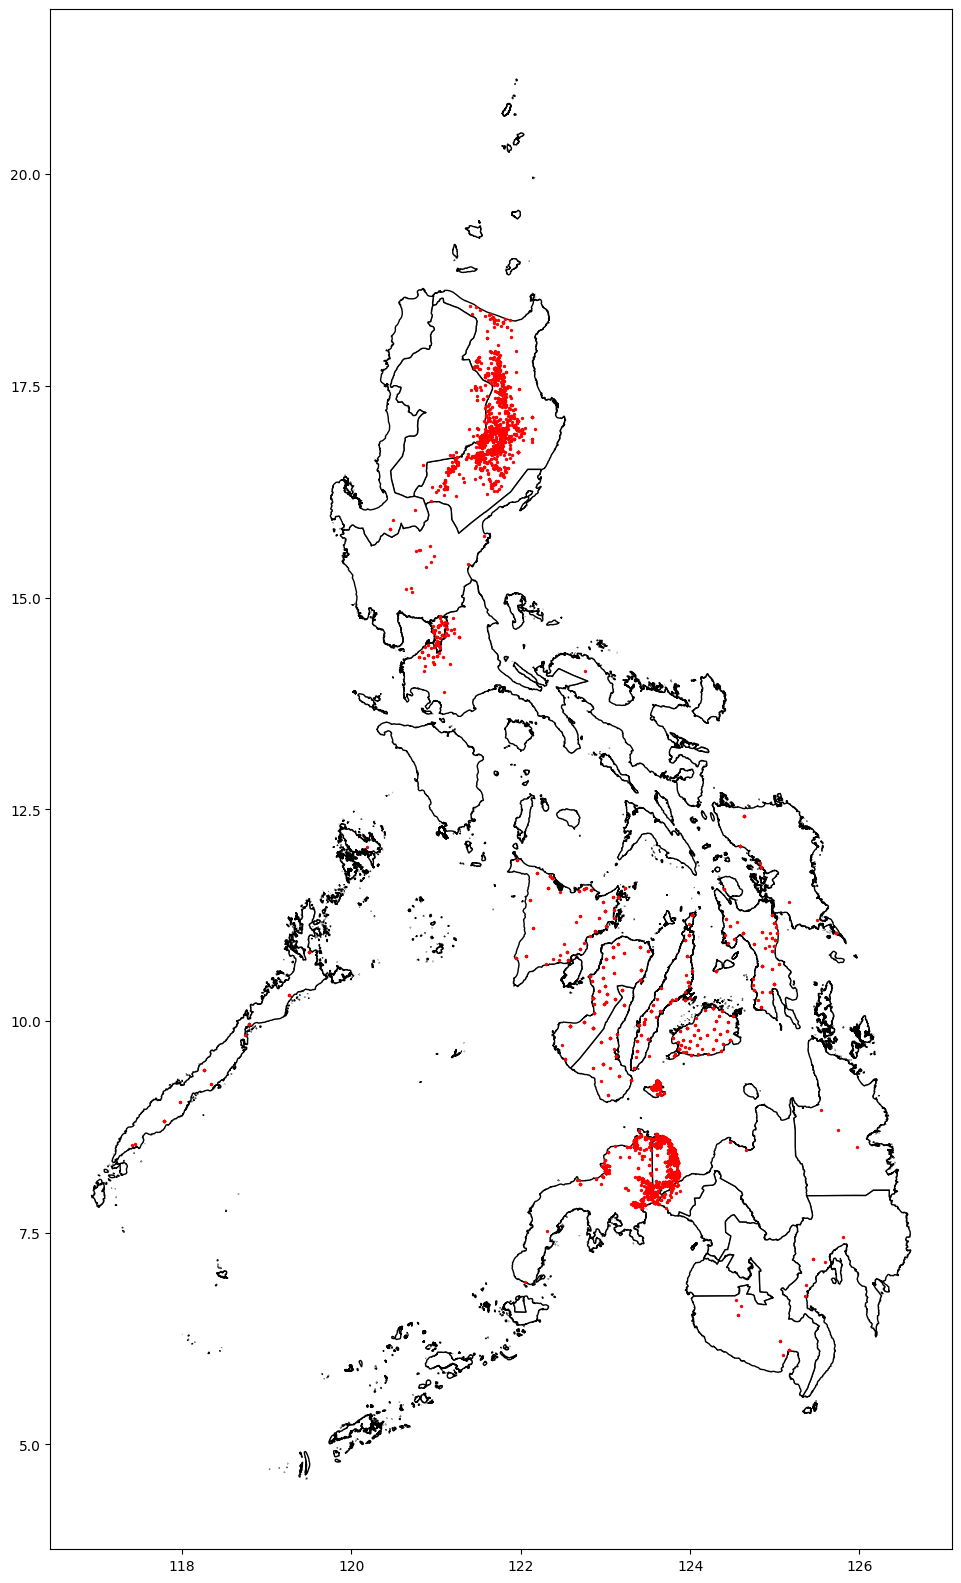

In [50]:
ax = PHL.plot(figsize=(20, 20), color='white', edgecolor='black')
PHL_loans.plot(color='red', markersize=2, ax=ax)

# Map of the Philippines

![](https://upload.wikimedia.org/wikipedia/commons/f/f6/Labelled_map_of_the_Philippines_-_Provinces_and_Regions.png)